In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('./Data_set/iris.csv')
df.head()

,sepallength(cm),sepalwidth(cm),petallength(cm),petalwidth(cm),class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df['class'].value_counts()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [6]:
new_df = df.iloc[:,:-1]
new_df.head()

,sepallength(cm),sepalwidth(cm),petallength(cm),petalwidth(cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
from sklearn import cluster

In [12]:
error=[]
for i in range(1,11):
    kmeans=cluster.KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(new_df)
    error.append(kmeans.inertia_)

/home/godslayer/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/godslayer/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/godslayer/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/godslayer/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 1

In [13]:
error

[681.3706,
 152.34795176035792,
 78.85144142614601,
 57.228473214285714,
 46.44618205128205,
 39.03998724608725,
 34.420191786283894,
 30.064593073593073,
 28.332569264069267,
 25.972596377306903]

Text(0, 0.5, 'Error')

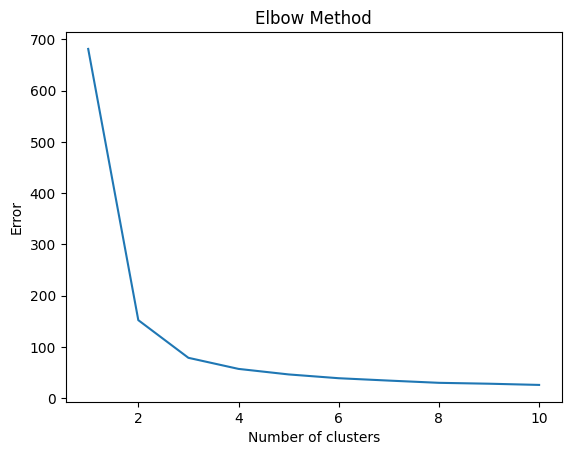

In [16]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),error)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Error')

In [17]:
kmean_modes=cluster.KMeans(n_clusters=3,init='k-means++',random_state=0)

In [18]:
print(kmean_modes)

KMeans(n_clusters=3, random_state=0)


In [21]:
pred=kmean_modes.fit(new_df)

/home/godslayer/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [23]:
pred=kmean_modes.predict(new_df)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [24]:
kmean_modes.predict([[1.1,1.3,1.4,1.5]])

/home/godslayer/.local/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1], dtype=int32)

In [25]:
pd.Series(pred)

0      1
1      1
2      1
3      1
4      1
      ..
145    2
146    0
147    2
148    2
149    0
Length: 150, dtype: int32

In [26]:
new_df['cluster']=pred

In [27]:
display(new_df.head())


,sepallength(cm),sepalwidth(cm),petallength(cm),petalwidth(cm),cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [28]:
new_df['cluster'].value_counts()

cluster
0    62
1    50
2    38
Name: count, dtype: int64

/tmp/ipykernel_33754/814903585.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(new_df['petallength(cm)'],new_df['cluster'],cmap='rainbow')


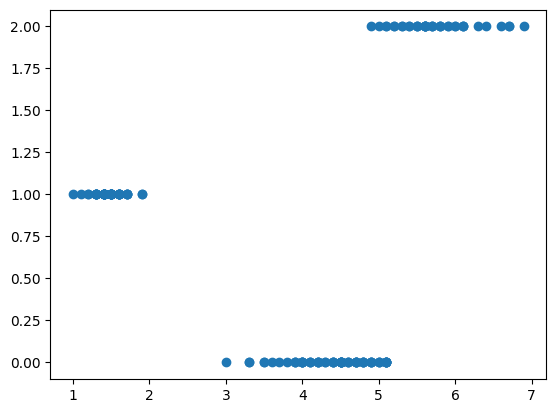

In [34]:
plt.scatter(new_df['petallength(cm)'],new_df['cluster'],cmap='rainbow')

In [36]:
kmean_modes.cluster_centroid_

AttributeError: 'KMeans' object has no attribute 'cluster_centroid_'